In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras, tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Reshape
from keras.models import Model

In [2]:
img_cols = img_rows = 28
epochs = 10
batch_size = 60

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 1, img_cols, img_rows)
x_test = x_test.reshape(x_test.shape[0], 1, img_cols, img_rows)
x_train = np.array(x_train, dtype = 'float32')
x_test = np.array(x_test, dtype = 'float32')
x_train = x_train / 255
x_test = x_test / 255

In [4]:
datagen = ImageDataGenerator(featurewise_center=True)
datagen.fit(x_train)

C:\Users\user\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:938: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  warnings.warn(


In [5]:
x_train_batch = datagen.flow(x_train, y_train, batch_size = 200)
x_test_batch = datagen.flow(x_test, y_test, batch_size = 100)
x_train = x_train_batch[0][0].reshape(200, img_rows * img_cols)
x_test = x_test_batch[0][0].reshape(100, img_rows * img_cols)
y_test = x_test_batch[0][1]

C:\Users\user\anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:129: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  warnings.warn('NumpyArrayIterator is set to use the '
C:\Users\user\anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:129: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (10000, 1, 28, 28) (28 channels).
  warnings.warn('NumpyArrayIterator is set to use the '


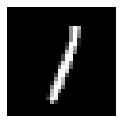

In [4]:
i = np.random.randint(len(x_train))
img = x_train[i].reshape(28, 28)
def one_plt(img):
    plt.figure(figsize = (2, 2))
    plt.imshow(img, cmap = 'gray')
    plt.axis('off')
    plt.show()
one_plt(img)

In [5]:
def one_part(units, x):
    return Dense(units, activation='relu')(x)

In [6]:
latent_size = 32 # Размер латентного пространста
inp = Input((1, img_cols, img_rows))
x = Reshape((-1, ))(inp)
x = one_part(512, x)
x = one_part(256, x)
x = one_part(128, x)
x = one_part(64, x)
encoded = one_part(latent_size, x)
x = one_part(64, encoded)
x = one_part(128, x)
x = one_part(256, x)
x = one_part(512, x)
x = Dense(img_cols * img_rows, activation='sigmoid')(x) 
decoded = Reshape((1, img_cols, img_rows))(x)
model = Model(inp, decoded, name="autoencoder")
model.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 28, 28)]       0         
_________________________________________________________________
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                

In [7]:
model.compile(optimizer='adam', loss='msle')
model.fit(x = x_train, y = x_train, batch_size= batch_size, epochs=epochs, shuffle=True)

Epoch 1/10
1000/1000 [==============================] - 17s 16ms/step - loss: 0.0186
Epoch 2/10
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0095
Epoch 3/10
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0076
Epoch 4/10
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0067
Epoch 5/10
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0061
Epoch 6/10
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0057
Epoch 7/10
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0054
Epoch 8/10
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0051
Epoch 9/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0049
Epoch 10/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0047


In [39]:
decoded_imgs1 = model.predict(x_test)
decoded_imgs2 = model.predict(x_train)
decoded_imgs1 = np.array(decoded_imgs1, dtype='float32')
decoded_imgs2 = np.array(decoded_imgs2, dtype='float32')
print(decoded_imgs1.shape)
print(decoded_imgs2.shape)

(10000, 1, 28, 28)
(60000, 1, 28, 28)


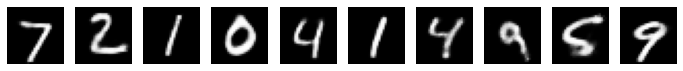

In [40]:
n = 10
f = plt.figure(figsize=(12, 10))
for i in range(n):
    # j = np.random.randint(0, high=len(x_y), dtype=int)
    sp = f.add_subplot(1, n, i+1)
    sp.axis('Off')
    img = decoded_imgs1[i]
    img = img.reshape(img_rows, img_cols)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
plt.show()

In [43]:
# x_train = decoded_imgs2.reshape(x_train.shape[0], 1, img_rows, img_cols)
# x_test = decoded_imgs1.reshape(x_test.shape[0], 1, img_rows, img_cols)
datagen = ImageDataGenerator(featurewise_center = True, samplewise_center = True)
print('Настройка генератора...')
datagen.fit(decoded_imgs1)
x_y_train = datagen.flow(decoded_imgs2, y_train, batch_size = 200)
x_y_test = datagen.flow(decoded_imgs1, y_test, batch_size = 50)
x_y_train = x_y_train[0][0].reshape(200, img_rows * img_cols)
x_y_test = x_y_test[0][0].reshape(50, img_rows * img_cols)

Настройка генератора...


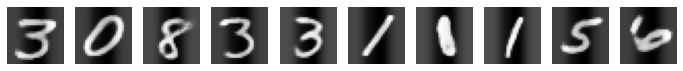

In [44]:
n = 10
f = plt.figure(figsize=(12, 10))
for i in range(n):
    # j = np.random.randint(0, high=len(x_y), dtype=int)
    sp = f.add_subplot(1, n, i+1)
    sp.axis('Off')
    img = x_y_test[i]
    img = img.reshape(img_rows, img_cols)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
plt.show()